<h1>  Eksplorasi dan Persiapan Data

In [1]:
import pandas as pd
data_test = pd.read_csv("kendaraan\kendaraan_test.csv")
data_train = pd.read_csv("kendaraan\kendaraan_train.csv")
data_train

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,2,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
2,3,NaN,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0,0
3,4,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
4,5,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
285826,285827,Wanita,23.0,1.0,4.0,1.0,< 1 Tahun,Tidak,25988.0,152.0,217.0,0
285827,285828,Wanita,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,44686.0,152.0,50.0,0
285828,285829,Wanita,23.0,1.0,50.0,1.0,< 1 Tahun,Tidak,49751.0,152.0,226.0,0
285829,285830,Pria,68.0,1.0,7.0,1.0,1-2 Tahun,Tidak,30503.0,124.0,270.0,0


In [2]:
data_train = data_train.set_index("id") #mengubah kolom id menjadi index

<h2> Menghilangkan Outliers

<AxesSubplot:ylabel='Premi'>

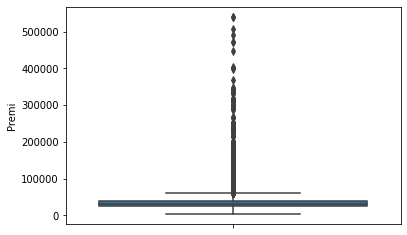

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.boxplot(y=data_train["Premi"])


<AxesSubplot:ylabel='Premi'>

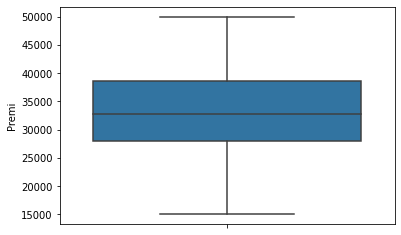

In [4]:

index = data_train[data_train["Premi"]>50000].index
data_train.drop(index=index,inplace=True)
index = data_train[data_train["Premi"]<15000].index
data_train.drop(index=index,inplace=True)
sns.boxplot(y=data_train["Premi"])



In [5]:
print(data_test.isnull().sum())
print(data_train.isnull().sum())

Jenis_Kelamin        0
Umur                 0
SIM                  0
Kode_Daerah          0
Sudah_Asuransi       0
Umur_Kendaraan       0
Kendaraan_Rusak      0
Premi                0
Kanal_Penjualan      0
Lama_Berlangganan    0
Tertarik             0
dtype: int64
Jenis_Kelamin        10988
Umur                 10721
SIM                  10916
Kode_Daerah          10804
Sudah_Asuransi       10785
Umur_Kendaraan       10770
Kendaraan_Rusak      10747
Premi                14569
Kanal_Penjualan      10811
Lama_Berlangganan    10608
Tertarik                 0
dtype: int64


<h1> Cleaning Data

In [6]:
train = data_train.replace(["Tidak","Pernah"],[0,1]).copy() #mengubah data string menjadi integer
train = train.replace(["Wanita","Pria"],[0,1]).copy()
train = train.replace(["< 1 Tahun","1-2 Tahun","> 2 Tahun"],[0,1,2]).copy()

test = data_test.replace(["Tidak","Pernah"],[0,1]).copy()
test = test.replace(["Wanita","Pria"],[0,1]).copy()
test = test.replace(["< 1 Tahun","1-2 Tahun","> 2 Tahun"],[0,1,2]).copy()


train = train.fillna(train.mean())# memasukan data yang null menjadi rata rata
test = test.fillna(test.mean())


train


,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
id,,,,,,,,,,,
1,0.000000,30.0,1.0,33.0,1.0,0.0,0.000000,28029.0,152.0,97.0,0
2,1.000000,48.0,1.0,39.0,0.0,2.0,1.000000,25800.0,29.0,158.0,0
3,0.532342,21.0,1.0,46.0,1.0,0.0,0.000000,32733.0,160.0,119.0,0
5,1.000000,50.0,1.0,35.0,0.0,2.0,0.480559,34857.0,88.0,194.0,0
6,1.000000,21.0,1.0,35.0,1.0,0.0,0.000000,22735.0,152.0,171.0,0
...,...,...,...,...,...,...,...,...,...,...,...
285827,0.000000,23.0,1.0,4.0,1.0,0.0,0.000000,25988.0,152.0,217.0,0
285828,0.000000,21.0,1.0,46.0,1.0,0.0,0.000000,44686.0,152.0,50.0,0
285829,0.000000,23.0,1.0,50.0,1.0,0.0,0.000000,49751.0,152.0,226.0,0


In [7]:
from sklearn import preprocessing
def normalisasi(condition,train):
    if condition==True:
        x = train.values
        cols = train.columns
        index = train.index
        scaler = preprocessing.MinMaxScaler()
        x_scaled = scaler.fit_transform(x)
        t = pd.DataFrame(x_scaled,columns=cols,index=index)
        return t
    return train


In [8]:
X_train = train.drop(["Tertarik"],axis=1) #Memasukan ke variabel tanpa kolom Tertarik
y_train  = train["Tertarik"]#Memasukan ke variabel hanya kolom Tertarik

X_test = test.drop(["Tertarik"],axis=1)
y_test  = test["Tertarik"]

In [9]:
X_train_scale = normalisasi(True,X_train)
X_test_scale = normalisasi(True,X_test)
display(X_train_scale)

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan
id,,,,,,,,,,
1,0.000000,0.153846,1.0,0.634615,1.0,0.0,0.000000,0.372257,0.932099,0.301038
2,1.000000,0.430769,1.0,0.750000,0.0,1.0,1.000000,0.308571,0.172840,0.512111
3,0.532342,0.015385,1.0,0.884615,1.0,0.0,0.000000,0.506657,0.981481,0.377163
5,1.000000,0.461538,1.0,0.673077,0.0,1.0,0.480559,0.567343,0.537037,0.636678
6,1.000000,0.015385,1.0,0.673077,1.0,0.0,0.000000,0.221000,0.932099,0.557093
...,...,...,...,...,...,...,...,...,...,...
285827,0.000000,0.046154,1.0,0.076923,1.0,0.0,0.000000,0.313943,0.932099,0.716263
285828,0.000000,0.015385,1.0,0.884615,1.0,0.0,0.000000,0.848171,0.932099,0.138408
285829,0.000000,0.046154,1.0,0.961538,1.0,0.0,0.000000,0.992886,0.932099,0.747405


<h1> Permodelan

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
classifiers = [
   KNeighborsClassifier(),
   DecisionTreeClassifier(),
   AdaBoostClassifier(),
   GradientBoostingClassifier(),
   RandomForestClassifier(),
   LogisticRegression(),
]


In [11]:

log_cols = ["Classifier","Accuracy"]

log = pd.DataFrame(columns=log_cols)

acc_dict = {}

for clf in classifiers:
    name = clf.__class__.__name__
    print(name)
    clf.fit(X=X_train_scale,y=y_train)
    train_predict = clf.predict(X_test_scale)
    acc = accuracy_score(y_test, train_predict)
    acc_dict[name] = acc
    
for clf in acc_dict:
    long_entry = pd.DataFrame([[clf,acc_dict[clf]]],columns=log_cols,) 
    log = log.append(long_entry)





KNeighborsClassifier
DecisionTreeClassifier
AdaBoostClassifier
GradientBoostingClassifier
RandomForestClassifier
LogisticRegression


<h1> Evaluasi

,Classifier,Accuracy
0,KNeighborsClassifier,0.845295
0,DecisionTreeClassifier,0.791138
0,AdaBoostClassifier,0.876656
0,GradientBoostingClassifier,0.876929
0,RandomForestClassifier,0.860450
0,LogisticRegression,0.875942


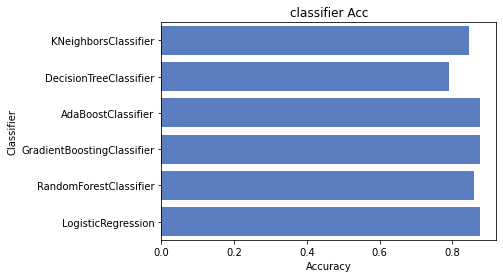

In [12]:

plt.xlabel("Acc")
plt.title("classifier Acc")

sns.set_color_codes("muted")
sns.barplot(x="Accuracy",y="Classifier",data=log,color="b")
display(log)

<h1> Eksperimen

In [13]:
from sklearn.metrics import classification_report
model_fit = GradientBoostingClassifier().fit(X_train_scale, y_train)
prediction =model_fit.predict(X_test_scale) 

print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93     41778
           1       0.42      0.00      0.00      5861

    accuracy                           0.88     47639
   macro avg       0.65      0.50      0.47     47639
weighted avg       0.82      0.88      0.82     47639



In [14]:

print(model_fit.get_params())

{'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'deviance', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_iter_no_change': None, 'random_state': None, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


In [15]:
model_fit = GradientBoostingClassifier(loss="exponential",max_depth=5,random_state=10,learning_rate=0.5,n_estimators=200).fit(X_train_scale, y_train)
prediction =model_fit.predict(X_test_scale) 

print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93     41778
           1       0.33      0.10      0.15      5861

    accuracy                           0.86     47639
   macro avg       0.61      0.54      0.54     47639
weighted avg       0.82      0.86      0.83     47639



In [16]:
print(model_fit.get_params())

{'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.5, 'loss': 'exponential', 'max_depth': 5, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 200, 'n_iter_no_change': None, 'random_state': 10, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}
